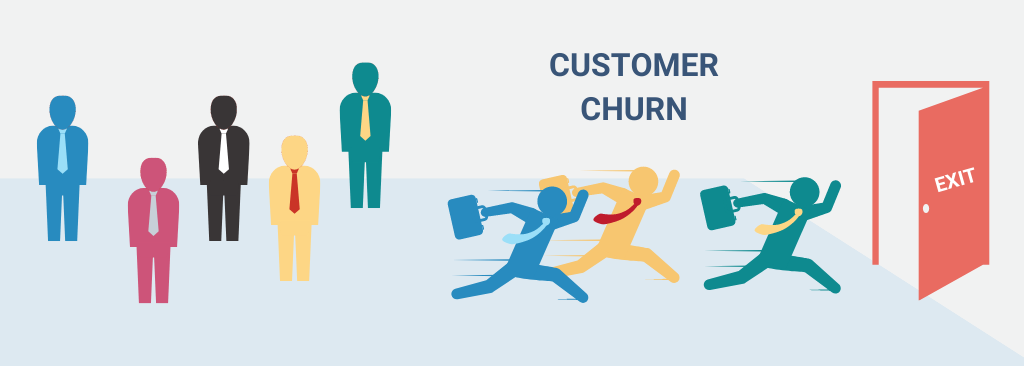

*   List item
*   List item



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
df=pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# **analysis and visualization**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [6]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
df["Exited"].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

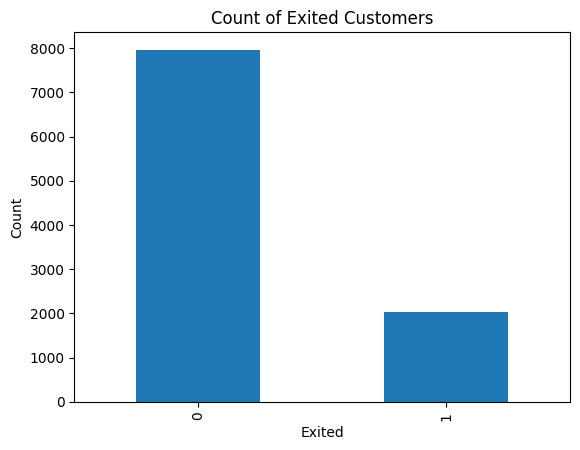

In [8]:
ax = df["Exited"].value_counts().plot(kind="bar")
plt.title("Count of Exited Customers")
plt.xlabel("Exited")
plt.ylabel("Count")
plt.show()


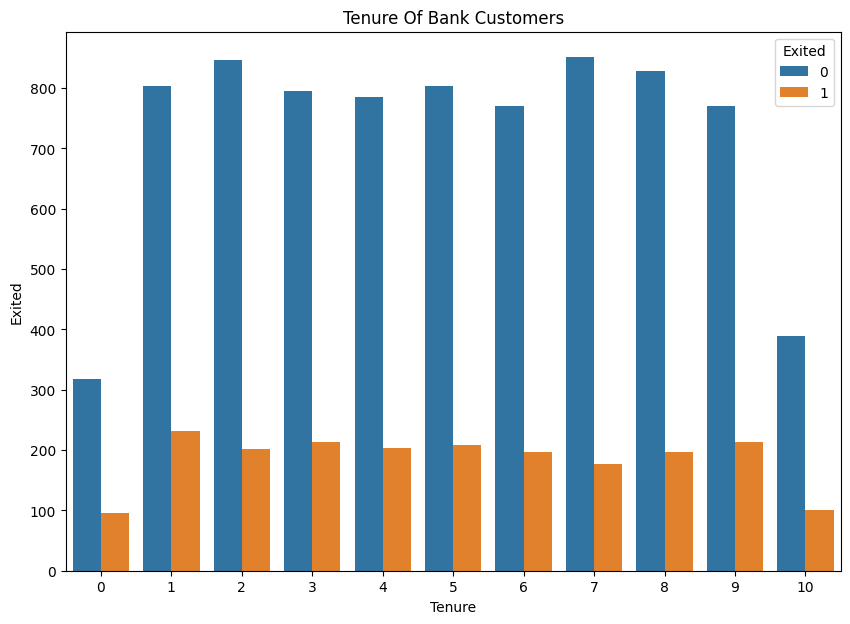

In [9]:
plt.figure(figsize=(10,7))
sn.countplot(data=df,x="Tenure",hue="Exited")
plt.title("Tenure Of Bank Customers")
plt.xlabel("Tenure")
plt.ylabel("Exited")
plt.show()

In [10]:
df_no_chern=df[df.Exited==0]
df_chern=df[df.Exited==1]

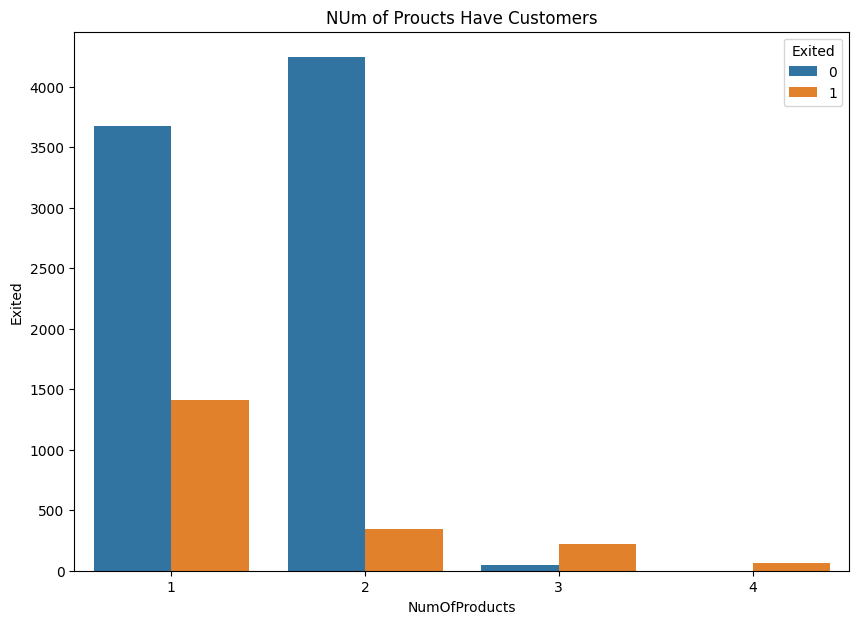

In [11]:
plt.figure(figsize=(10,7))
sn.countplot(data=df,x="NumOfProducts",hue="Exited")
plt.title("NUm of Proucts Have Customers")
plt.xlabel("NumOfProducts")
plt.ylabel("Exited")
plt.show()

# **prepare data for Deep learning models**

In [12]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [13]:
for columns in df.columns:
  print(f"{columns} : {df[columns].unique()}")

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [14]:
df['Gender'].replace({"Female":0,"Male":1},inplace=True)

In [15]:
for columns in df.columns:
  print(f"{columns} : {df[columns].unique()}")

CreditScore : [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 

In [16]:
df1=pd.get_dummies(data=df,columns=["Geography"],drop_first=True).astype(int)
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0,1,1,1,101348,1,0,0
1,608,0,41,1,83807,1,0,1,112542,0,0,1
2,502,0,42,8,159660,3,1,0,113931,1,0,0
3,699,0,39,1,0,2,0,0,93826,0,0,0
4,850,0,43,2,125510,1,1,1,79084,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0,2,1,0,96270,0,0,0
9996,516,1,35,10,57369,1,1,1,101699,0,0,0
9997,709,0,36,7,0,1,0,1,42085,1,0,0
9998,772,1,42,3,75075,2,1,0,92888,1,1,0


In [17]:
scale_column=["CreditScore","Age","Tenure","Balance","NumOfProducts","EstimatedSalary"]

In [18]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
df1[scale_column]=sc.fit_transform(df1[scale_column])

In [19]:
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506733,1,0,0
1,0.516,0,0.310811,0.1,0.334028,0.000000,0,1,0.562708,0,0,1
2,0.304,0,0.324324,0.8,0.636354,0.666667,1,0,0.569654,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0,0
4,1.000,0,0.337838,0.2,0.500243,0.000000,1,1,0.395403,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,1,0.283784,0.5,0.000000,0.333333,1,0,0.481341,0,0,0
9996,0.332,1,0.229730,1.0,0.228655,0.000000,1,1,0.508488,0,0,0
9997,0.718,0,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,0,0
9998,0.844,1,0.324324,0.3,0.299225,0.333333,1,0,0.464429,1,1,0


# **Train Test Split**

In [20]:
X = df1.drop(columns=["Exited"])
y=df1["Exited"]

In [21]:
print(X.shape)
print(y.shape)

(10000, 11)
(10000,)


In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


# **Build a model (ANN) in tensorflow/keras**

In [24]:
import tensorflow as tf
from tensorflow import keras

keras module from tensorflow. Keras is a high-level API for building and training deep learning models.

In [25]:
#initializes a sequential model
model = keras.Sequential([
    keras.layers.Dense(8, input_shape=(11,), activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])
#This configures the model for training
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics="accuracy"
)

model.fit(X_train,y_train,epochs=20)

Epoch 1/20
250/250 [==============================] - 1s 2ms/step - loss: 0.5642 - accuracy: 0.7596
Epoch 2/20
250/250 [==============================] - 0s 2ms/step - loss: 0.4972 - accuracy: 0.7939
Epoch 3/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4770 - accuracy: 0.7946
Epoch 4/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4648 - accuracy: 0.7981
Epoch 5/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4553 - accuracy: 0.8021
Epoch 6/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4475 - accuracy: 0.8081
Epoch 7/20
250/250 [==============================] - 0s 2ms/step - loss: 0.4423 - accuracy: 0.8108
Epoch 8/20
250/250 [==============================] - 0s 1ms/step - loss: 0.4374 - accuracy: 0.8121
Epoch 9/20
250/250 [==============================] - 1s 2ms/step - loss: 0.4337 - accuracy: 0.8152
Epoch 10/20
250/250 [==============================] - 1s 2ms/step - loss: 0.4300 - accuracy: 0.8146

In [26]:
y_pred=model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [27]:
y_pred

array([[0.23377654],
       [0.05505951],
       [0.22461599],
       ...,
       [0.48436287],
       [0.17861381],
       [0.18221582]], dtype=float32)

In [28]:
y_predict=[]
for element in y_pred:
  if element > 0.5:
    y_predict.append(1)
  else:
    y_predict.append(0)

In [29]:
y_predict[:20]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]

In [30]:
y_test[:20]

6252    0
4684    0
1731    0
4742    0
4521    0
6340    0
576     0
5202    1
6363    0
439     0
2750    1
7487    1
5272    1
5653    0
3999    0
6033    0
582     0
9930    0
7051    0
8158    0
Name: Exited, dtype: int64

In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1607
           1       0.65      0.27      0.39       393

    accuracy                           0.83      2000
   macro avg       0.75      0.62      0.64      2000
weighted avg       0.81      0.83      0.80      2000



In [33]:
cm=confusion_matrix(y_test,y_predict)

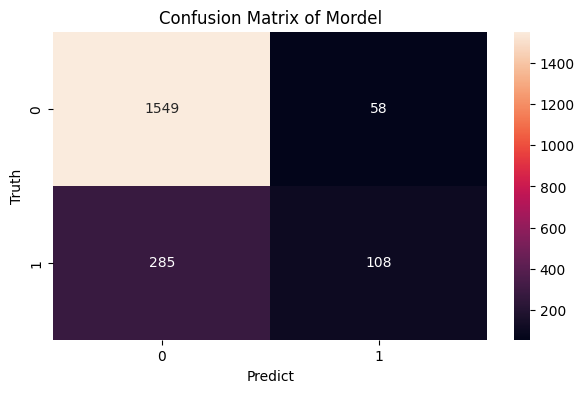

In [34]:
plt.figure(figsize=(7,4))
sn.heatmap(data=cm,annot=True,fmt="d")
plt.title("Confusion Matrix of Mordel")
plt.xlabel("Predict")
plt.ylabel("Truth")
plt.show()